# Employess leaving rate to the organization data analysis


# Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline
import warnings
#import pydot
warnings.filterwarnings('ignore')
sns.set(style='white', context='notebook', palette='deep')
np.random.seed(seed=2)

# Load the data

In [4]:
# Load the data
df = pd.read_csv("HR_comma_sep.csv")

In [5]:
# dataset shape
df.shape

(14999, 10)

In [6]:
# Top rows of the dataset
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


# Data Cleaning

In [8]:
# Check for missing values
print(df.isnull().sum())

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64


In [9]:
# Analyze the dataset to uncover its statitcs?
df.describe()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [10]:
# How many people left the organization with each type of salries?
salary = df[['salary', 'left']].copy()
size = salary.groupby(['salary', 'left'])
size.size()

salary  left
high    0       1155
        1         82
low     0       5144
        1       2172
medium  0       5129
        1       1317
dtype: int64

In [11]:
# Which sales has the highest sales with respect to the number of project count?
sales = df.groupby(['sales'])['number_project'].count().reset_index()
sales

,sales,number_project
0,IT,1227
1,RandD,787
2,accounting,767
3,hr,739
4,management,630
5,marketing,858
6,product_mng,902
7,sales,4140
8,support,2229
9,technical,2720


# Data Visulization

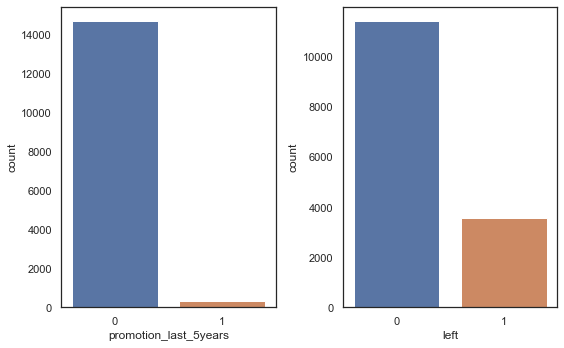

<Figure size 432x288 with 0 Axes>

In [22]:
# What is the last year promotion rate of the employess to left organization?
fig, axs = plt.subplots(ncols=2,figsize=(8,5))
sns.countplot(df["promotion_last_5years"], ax=axs[0])
sns.countplot(df["left"], ax=axs[1])
plt.tight_layout()
plt.show()
plt.gcf().clear()

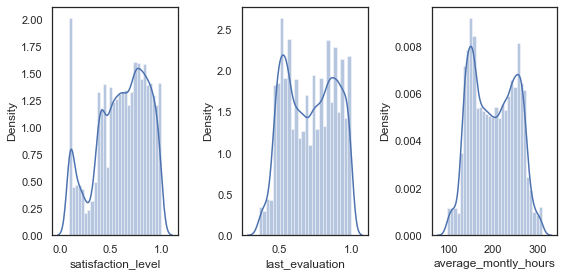

<Figure size 432x288 with 0 Axes>

In [23]:
# Plot the relationship between satisfaction level, average monthly hours and lat evaluation?
fig, axs = plt.subplots(ncols=3,figsize=(8,4))
sns.distplot(df["satisfaction_level"], ax=axs[0])
sns.distplot(df["last_evaluation"], ax=axs[1])
sns.distplot(df["average_montly_hours"], ax=axs[2])
plt.tight_layout()
plt.show()
plt.gcf().clear()

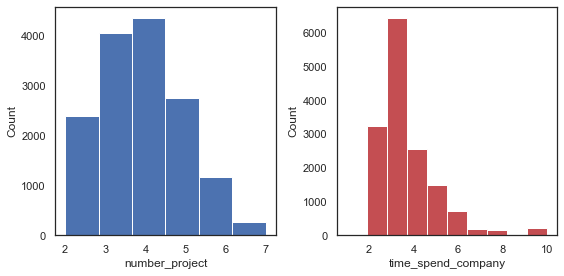

<Figure size 432x288 with 0 Axes>

In [24]:
fig, axs = plt.subplots(ncols=2,figsize=(8,4))
axs[0].hist(df["number_project"],bins=6)
axs[0].set_xlabel("number_project")
axs[0].set_ylabel("Count")
axs[1].hist(df["time_spend_company"],bins=10,color="r",range=(1,10))
axs[1].set_xlabel("time_spend_company")
axs[1].set_ylabel("Count")
plt.tight_layout()
plt.show()
plt.gcf().clear()

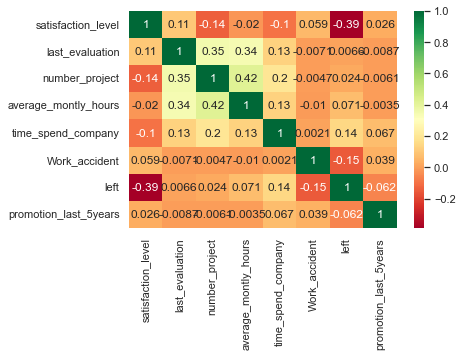

In [25]:
g = sns.heatmap(df.corr(),annot=True,cmap="RdYlGn")